# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.


## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project,the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts will be evaluated. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are hypothesised to be essential for this analysis. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Complete Attribute information is shown below:
* `CRIM`: per capita crime rate by town
* `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS`: proportion of non-retail business acres per town
* `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `NOX`: nitric oxides concentration (parts per 10 million)
* `RM`: average number of rooms per dwelling
* `AGE`: proportion of owner-occupied units built prior to 1940
* `DIS`: weighted distances to five Boston employment centres
* `RAD`: index of accessibility to radial highways
* `TAX`: full-value property-tax rate per 10,000
* `PTRATIO`: pupil-teacher ratio by town
* `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT`: perentage lower status of the population
* `MEDV`: Median value of owner-occupied homes in $1000's

In [212]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit
import matplotlib as plt
# Pretty display for notebooks
%matplotlib inline
plt.style.use('ggplot')

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

In [213]:
print prices.head()
print features.head()

0    504000
1    453600
2    728700
3    701400
4    760200
Name: MEDV, dtype: float64
      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7


### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [214]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)
def show_data_stats():# Show the calculated statistics
    print "\nStatistics for Boston housing dataset:\n"
    print "Minimum price: ${:,.2f}".format(minimum_price)
    print data.iloc[[data['MEDV'].argmin()]]
    print "\nMaximum price: ${:,.2f}".format(maximum_price)
    print data.iloc[[data['MEDV'].argmax()]]
    print "\nPrice Range: ${:,.2f}".format(maximum_price-minimum_price)
    print "Mean price: ${:,.2f}".format(mean_price)
    print "Median price ${:,.2f}".format(median_price)
    print "Standard deviation of prices: ${:,.2f}".format(std_price)
    
show_data_stats()


Statistics for Boston housing dataset:

Minimum price: $105,000.00
        RM  LSTAT  PTRATIO    MEDV
381  5.453  30.59     20.2  105000

Maximum price: $1,024,800.00
        RM  LSTAT  PTRATIO     MEDV
253  8.398   5.91       13  1024800

Price Range: $919,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
* As the `'RM'` value increases, the `'MEDV'` should increase as each of the houses in that neighbourhood has more rooms, and is thus more desirable (i.e a `RM` value of 6 should be worth less than a `RM` values of 7).
* As the `'LSTAT'` value increases, the `'MEDV'` should be expected to decrease, as having more lower class people in a nighbourhood is considered indesirable.
* As the `'PTRATIO'` increases, the `'MEDV'` should be expeced to decrease as having more students in neighbourhood schools is typically considered indesirable.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [215]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [216]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer: **

R-squared = Explained variation / Total variation

* 0% indicates that the model explains none of the variability of the response data around its mean.
* 100% indicates that the model explains all the variability of the response data around its mean.

The R<sup>2</sup> is 0.923, which means the model explains 92.3% of the variance in the target variable. A model predicting non of the variability of the response data would get an R<sup>2</sup> of only 0.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [218]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** The benefit to splitting the data into testing and training sets is that this allows simulated evaluation of how well the model is performing before using it in the real world to make predictions. 

If there was no testing set, there would be no way of realistically evaluating the model as you would only be able to measure it's performace on data to which it's already been exposed. This will result in a false sense of confidence in how well the model performs.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

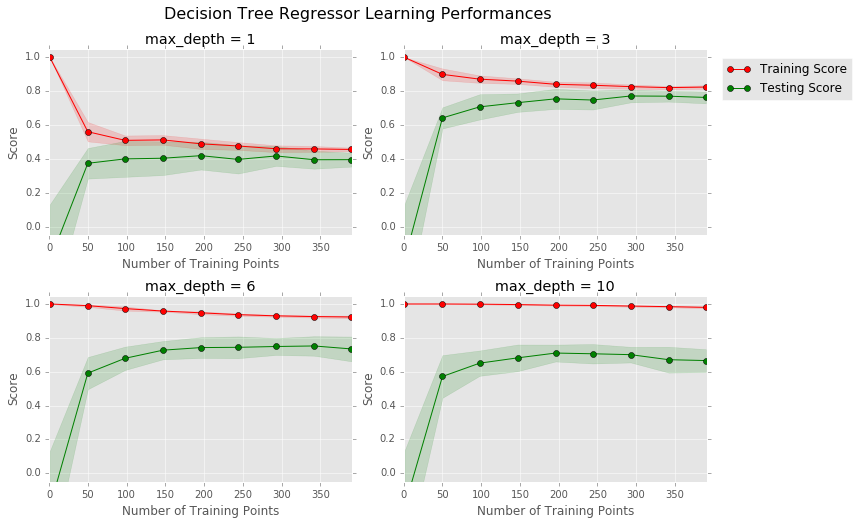

In [219]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** In the max_depth graph, the training and testing scores seems to converge at a high score level. This is indicative of a well designed model, as it doesn't have high error between the training and validation score (indicating high varience and a model that is too complex and overfits the data) or a low convergence score (indicating high bias due to a model that is not complex enough and underfits the data). As the values seems to converge at roughly 250 points of data, it does not appear that adding any more data points would cuase the model to perform better.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

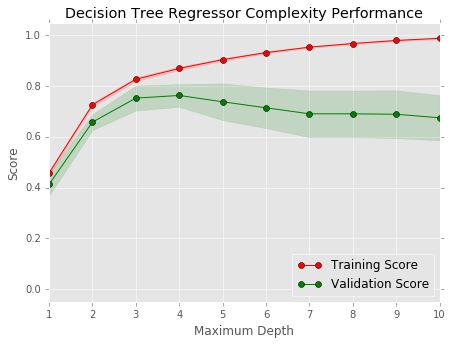

In [220]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** At a depth of 1, the model suffers from high bias, it is simply not complicated enough to describe the underlying data. This is evidenced by the validation and training scores being low at low model complexities. When it is trained to a maximum depth of 10, it suffers from high variance. It is too compicated and overfits the data. This is evidenced by the error between the testing score and the validation score. It is noted that the validation score decreases as the maximum depth is increased past 3-4.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** Based on the complexity curves shown above, it would seem that the best maximum depth for the decision tree regressor is 3 or 4.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`. 

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** The grid search technique works by generating a grid of all possible provided parameter combinations. It then evaluates a model using a validation set based on every combination of parameters in the grid. It is used to find the optimum set of parameters for a learning algorithm given a data set.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** The k-folds validation training technique creates multiple testing and training sets and trains a model on each, averaging the results. The splitting method is to divide the data into separate bins (for example k = 5),  train on bins 1 to k-1 and test on bin k. The next fold trains on bins 2 to k and tests on bin 1 and so on, until all of the bins have acted as a test bin. This effectively trains and tests the models on all of the data without overfitting to the data.

The benefits that this provides for grid search while optimizing the model is that there is less of a chance that the final model won't be optimized to data that could potentially have a bias. For example, if somehow, all of the training data didn't contain a unique data point (such as a high `MEDV` value for a low `RM`) the final model would be very biased not predict this scenario, and the optimization will make that worse. However, with k-folds validation, one of the trained models will see the unique data point and the result will be reflected in the final averaged model. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [227]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn import grid_search

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11)),
              'min_samples_split': list(range(1,5))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric) 

    # Create the grid search object
    grid = grid_search.GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_




### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [228]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** The result of a max_depth of 4 for the model is the same as what was observed in the model complexity visualization.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [231]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


A couple more helpful statistics:

In [232]:
show_data_stats()
print 'The max and min RM values in the set:', data['RM'].max(), data['RM'].min() 
print 'The max and min LSTAT values in the set:', data['LSTAT'].max(), data['LSTAT'].min() 
print 'The max and min PTRATIO values in the set:', data['PTRATIO'].max(), data['PTRATIO'].min() 


Statistics for Boston housing dataset:

Minimum price: $105,000.00
        RM  LSTAT  PTRATIO    MEDV
381  5.453  30.59     20.2  105000

Maximum price: $1,024,800.00
        RM  LSTAT  PTRATIO     MEDV
253  8.398   5.91       13  1024800

Price Range: $919,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
The max and min RM values in the set: 8.398 3.561
The max and min LSTAT values in the set: 37.97 1.98
The max and min PTRATIO values in the set: 22.0 12.6


**Answer: ** Looking at the statistics above we can make a rough estimate for each of the clients expected house value. According the the hypothesis made in the begining of the notebook:

- As `'RM'` value increases, the `'MEDV'` should increase.
- As `'LSTAT'` value increases, the `'MEDV'` should be expected to decrease.
- As `'PTRATIO'` increases, the `'MEDV'` should be expected to decrease.

#### For client 1:
* An `RM` value of 5 is on the lower side in terms of the other data as so would suggest a `MEDV` value lower than the mean of the rest of the data.
* An `LSTAT` of 17% is around the center of the max and min values seen for the data and would suggest a `MEDV` value around the mean of the data. 
* An `PTRATIO` of 15 to 1 is in the lower half of the rest of the data and would suggest a higher than average `MERV`
* The overall expectation is a `MERV` value within a standard deviation of the mean as all of it's catagories are middle of the road with respect to the rest of the data.

#### For client 2:
* An `RM` value of 4 is on the lower side in terms of the other data as so would suggest a `MEDV` value lower than the mean of the rest of the data.
* An `LSTAT` of 32% is on the higher side in terms of the data and so would again suggest a `MEDV` value lower than the mean of the rest of the data 
* An `PTRATIO` of 22 to 1 is in the higher half of the rest of the data and so would again suggest a `MEDV` value lower than the mean of the rest of the data 
* The overall expectation is that the `MERV` value should be below a standard deviation of the mean as it scores on the lower side on all catagories.

#### For client 3:
* An `RM` value of 8 is on the higher side in terms of the other data as so would suggest a `MEDV` value higher than the mean of the rest of the data.
* An `LSTAT` of 3% is on the lower side in terms of the data and so would again suggest a `MEDV` value higher than the mean of the rest of the data 
* An `PTRATIO` of 12 to 1 is in the lower side of the rest of the data and so would again suggest a `MEDV` value higher than the mean of the rest of the data 
* The overall expectation is that the `MERV` value should be above a standard deviation of the mean as it scores higher in all catagories.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [225]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The assess the suitability of this model for a real-world setting, the following points are discussed:

* _Relevancy:_ The contructed model is based on the `RM` value, or amount of rooms, the `LSTAT`, or percentage of lower class people in the neighbourhood, and the `PTRATIO` or ratio of students to teachers in the local school. These indicators are still relevant today, however, their importances might change given more modern data. For example, if we look at the feature importances below for our trained model, we can see that the `LSTAT` dominates the importance for the model. For more modern data, this importance might change. As shown in the study [here](http://blog.case.edu/nimc/2013/12/05/State_of_the_Field_Scan_1_National_Initiative_on_Mixed-Income_Communities.pdf), modern trends are for more class segregated communities (unfortunately) so perhaps this importance will increase.


* _Number of Features:_ The examined features are only a subset of the larger feature set and perhaps a more in depth analysis would include other features. As the affordability of cars decreases, the `DIS` features, or the weighted distances to five Boston employment centres could become more important. A method such as Principal Component Analysis or PCA could be used to determine how effective other features are for the model.


* _Robustness_: The model shows a range of ~73,000 for the mean when trained on the data that is randomly suffled in 10 different ways (still using the same cross-validation methods described above). This is roughly 50 percent of the standard deviation of the prices. This is a huge difference. As someone buying a house, $73,000 is a lot of money to be losing/gaining.


* _Generalization:_ This model is largely useless outside of a urban city such as Boston. In a Rural city, houses can be much larger due to there being more space and there is much less of a possibility of being able to choose a school with a better student to teach ration as rural cities often only have a handful to choose from. In short, city values are much different than small town values.

Due to the above discussion, the model is not suitable to be used in a modern application. In order to improve it's performance, it is recommended that more modern data is used, and more features are encorporated into the analysis. In addition, the model should never be used in a different environment type (i.e rural vs. urban).

In [226]:
rm = fit_model(X_train,y_train).feature_importances_[0]
lstat = fit_model(X_train,y_train).feature_importances_[1]
ptratio = fit_model(X_train,y_train).feature_importances_[2]
print 'RM Importance: {:.3f} \nLSTAT Importance: {:.3f} \nPTRATIO Importance: {:.3f}'.format(rm,lstat,ptratio)

RM Importance: 0.312 
LSTAT Importance: 0.655 
PTRATIO Importance: 0.033
